In [3]:
# First things first: Please select a GPU backend.

In [4]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


---
Click the folder button on the left, and Colab will display a file window. (Probably you might have to wait for at most 10 seconds, before the `drive` folder shows up.) Find the zip file `psychological-dataset.zip` under the drive folder.

In [5]:
# Unzip
!unzip -q "/content/drive/MyDrive/Deep Learning/final project/dataset.zip" -d /content/


In [6]:
import pandas as pd

df_init=pd.read_csv("creditcard.csv")

df_init.Class.value_counts().rename(index = {0:'Not Fraud', 1:'Fraud'})


Not Fraud    284315
Fraud           492
Name: Class, dtype: int64

In [7]:
#------------preprocessing--------------

from sklearn.preprocessing import StandardScaler

#Scale Time and Amount as other features:
df_init['Time'] = StandardScaler().fit_transform(df_init['Time'].values.reshape(-1, 1))
df_init['Amount'] = StandardScaler().fit_transform(df_init['Amount'].values.reshape(-1, 1))

#Split the dataset:
x = df_init.drop(['Class'], axis = 1)
y = df_init['Class']

#Normalize the data to 0-1:
for col in x.columns: # Min-max scaling => (x - min(x)) / max(x) - min(x) n 
    x.loc[:,col]=(x.loc[:,col]-x.loc[:,col].min())/(x.loc[:,col].max()-x.loc[:,col].min())




In [8]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


In [9]:
#Train Test Split + SMOKE: oversample the minority case
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3, random_state=2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


In [10]:
#SMOTE

smt = SMOTE(random_state=2)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))




After OverSampling, the shape of train_X: (398012, 30)
After OverSampling, the shape of train_y: (398012,) 

After OverSampling, counts of label '1': 199006
After OverSampling, counts of label '0': 199006


Let's start to build our model!

In [11]:
#Model Evaluation

def evaluatemodel(model,model_hist,X_test,y_test):
    print('Training loss:', model_hist.history['loss'][-1])
    print('Training accuracy:', model_hist.history['acc'][-1], '\n')
    score = model.evaluate(X_test, y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])


In [12]:
#Model result visualization

import matplotlib.pyplot as plt

def plotresults(model_hist):
  
    acc = model_hist.history['acc']
    val_acc = model_hist.history['val_acc']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    ##Accuracy
    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='test accuracy')
    plt.title('Training and test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    ##Loss
    plt.plot(epochs, loss, linewidth=2, label='Train loss')
    plt.plot(epochs, val_loss, linewidth=2, label='Test loss')
    plt.title('Model loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
  


In [13]:
import keras
from keras import layers
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dense, Activation, Lambda, Reshape, Flatten,Dropout,BatchNormalization
from keras.models import Model, Sequential 
from keras import backend as K
from keras import regularizers
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline



In [14]:
#if you did not install tensorflow, please use the below code. 
#!pip install tensorflow

In [20]:
epoch_no = 30
batch_size = 80
input_dim = x_train_res.shape[1]
learning_rate = 1e-7

In [25]:

input = Input(shape=(input_dim,))

encoded = Dense(input_dim, activation= 'relu')(input)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)
encoded = Dense(16, activation = 'relu')(encoded)

decoded = Dense(16, activation = 'relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
output = Dense(input_dim, activation='sigmoid')(decoded)


autoencoder = Model(input, output)

autoencoder.compile(optimizer='adam', loss='mse',metrics=['acc'])
#autoencoder_optimizer = keras.optimizers.RMSprop(lr=0.0004) 

#autoencoder.compile(optimizer=autoencoder_optimizer, loss='binary_crossentropy',metrics=['acc'])
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_20 (Dense)            (None, 30)                930       
                                                                 
 dense_21 (Dense)            (None, 128)               3968      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 32)                544 

In [26]:
history=autoencoder.fit(x_train_res, x_train_res,
                        batch_size=batch_size,
                        epochs=epoch_no,
                        shuffle=True,
                        validation_data=(x_test,x_test))

autoencoder.evaluate(x_test, verbose=1)



Epoch 1/30
4976/4976 [==============================] - 14s 3ms/step - loss: 0.0014 - acc: 0.9128 - val_loss: 7.9677e-04 - val_acc: 0.9553
Epoch 2/30
4976/4976 [==============================] - 13s 3ms/step - loss: 4.6732e-04 - acc: 0.9427 - val_loss: 4.5256e-04 - val_acc: 0.9565
Epoch 3/30
4976/4976 [==============================] - 15s 3ms/step - loss: 3.1630e-04 - acc: 0.9559 - val_loss: 3.2906e-04 - val_acc: 0.9565
Epoch 4/30
4976/4976 [==============================] - 13s 3ms/step - loss: 2.2621e-04 - acc: 0.9615 - val_loss: 3.1668e-04 - val_acc: 0.9585
Epoch 5/30
4976/4976 [==============================] - 13s 3ms/step - loss: 2.0577e-04 - acc: 0.9640 - val_loss: 2.8163e-04 - val_acc: 0.9605
Epoch 6/30
4976/4976 [==============================] - 13s 3ms/step - loss: 1.9322e-04 - acc: 0.9650 - val_loss: 2.6969e-04 - val_acc: 0.9675
Epoch 7/30
4976/4976 [==============================] - 13s 3ms/step - loss: 1.8385e-04 - acc: 0.9659 - val_loss: 2.4783e-04 - val_acc: 0.9646
Epo

[0.0, 0.0]

In [27]:
evaluatemodel(autoencoder,history, x_test, x_test)

Training loss: 0.00011985524906776845
Training accuracy: 0.9770861268043518 

2671/2671 [==============================] - 3s 1ms/step - loss: 1.7784e-04 - acc: 0.9775
Test loss: 0.00017784067313186824
Test accuracy: 0.9774820804595947


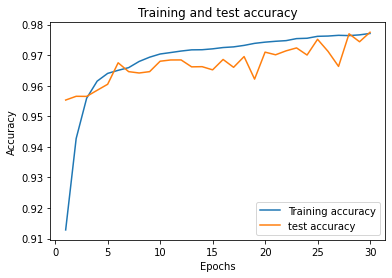

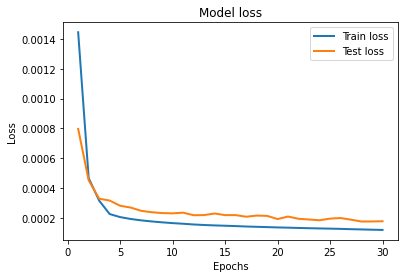

In [28]:
plotresults(history)